In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cardekho_dataset.csv')

In [3]:
df.head()

,index,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,NaN,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1.0,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2.0,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3.0,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4.0,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.columns


Index(['index', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              15410 non-null  float64
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.6+ MB


In [6]:
df = df.drop(['index','car_name','model'],axis=1)

In [7]:
df = pd.get_dummies(df, columns=['brand', 'seller_type', 'fuel_type', 'transmission_type'], drop_first=True)

In [8]:
df.isnull().sum()

vehicle_age                     0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
selling_price                   0
brand_BMW                       0
brand_Bentley                   0
brand_Datsun                    0
brand_Ferrari                   0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_ISUZU                     0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land Rover                0
brand_Lexus                     0
brand_MG                        0
brand_Mahindra                  0
brand_Maruti                    0
brand_Maserati                  0
brand_Mercedes-AMG              0
brand_Mercedes-Benz             0
brand_Mini                      0
brand_Nissan  

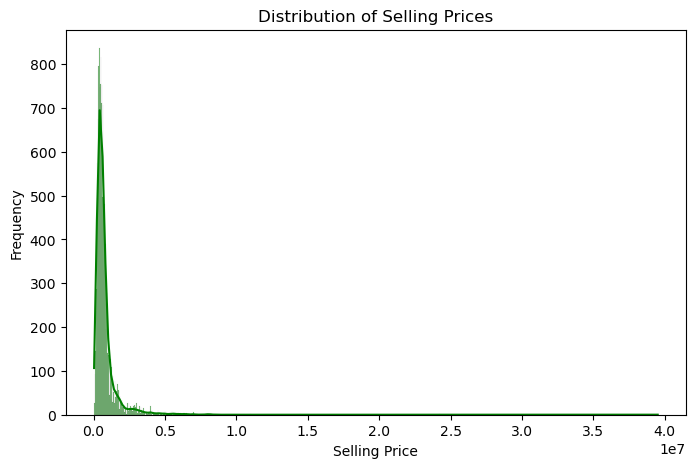

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True, color='green')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

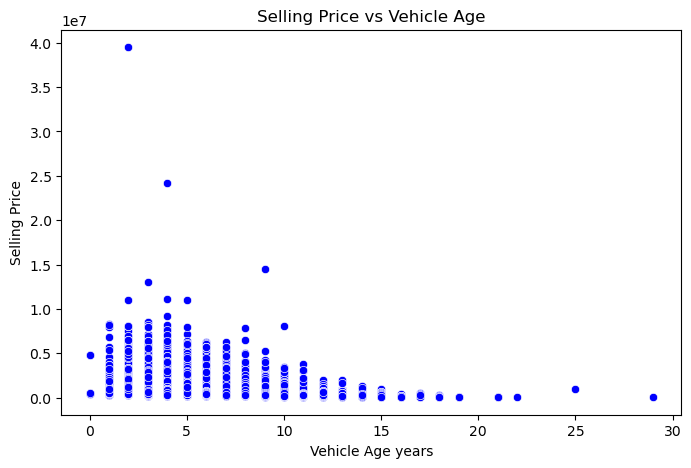

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df, color='blue')
plt.title('Selling Price vs Vehicle Age')
plt.xlabel('Vehicle Age years')
plt.ylabel('Selling Price')
plt.show()

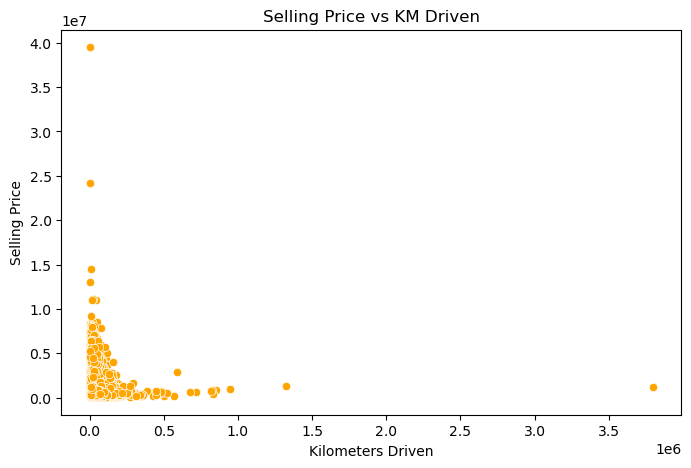

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='km_driven', y='selling_price', data=df, color='orange')
plt.title('Selling Price vs KM Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

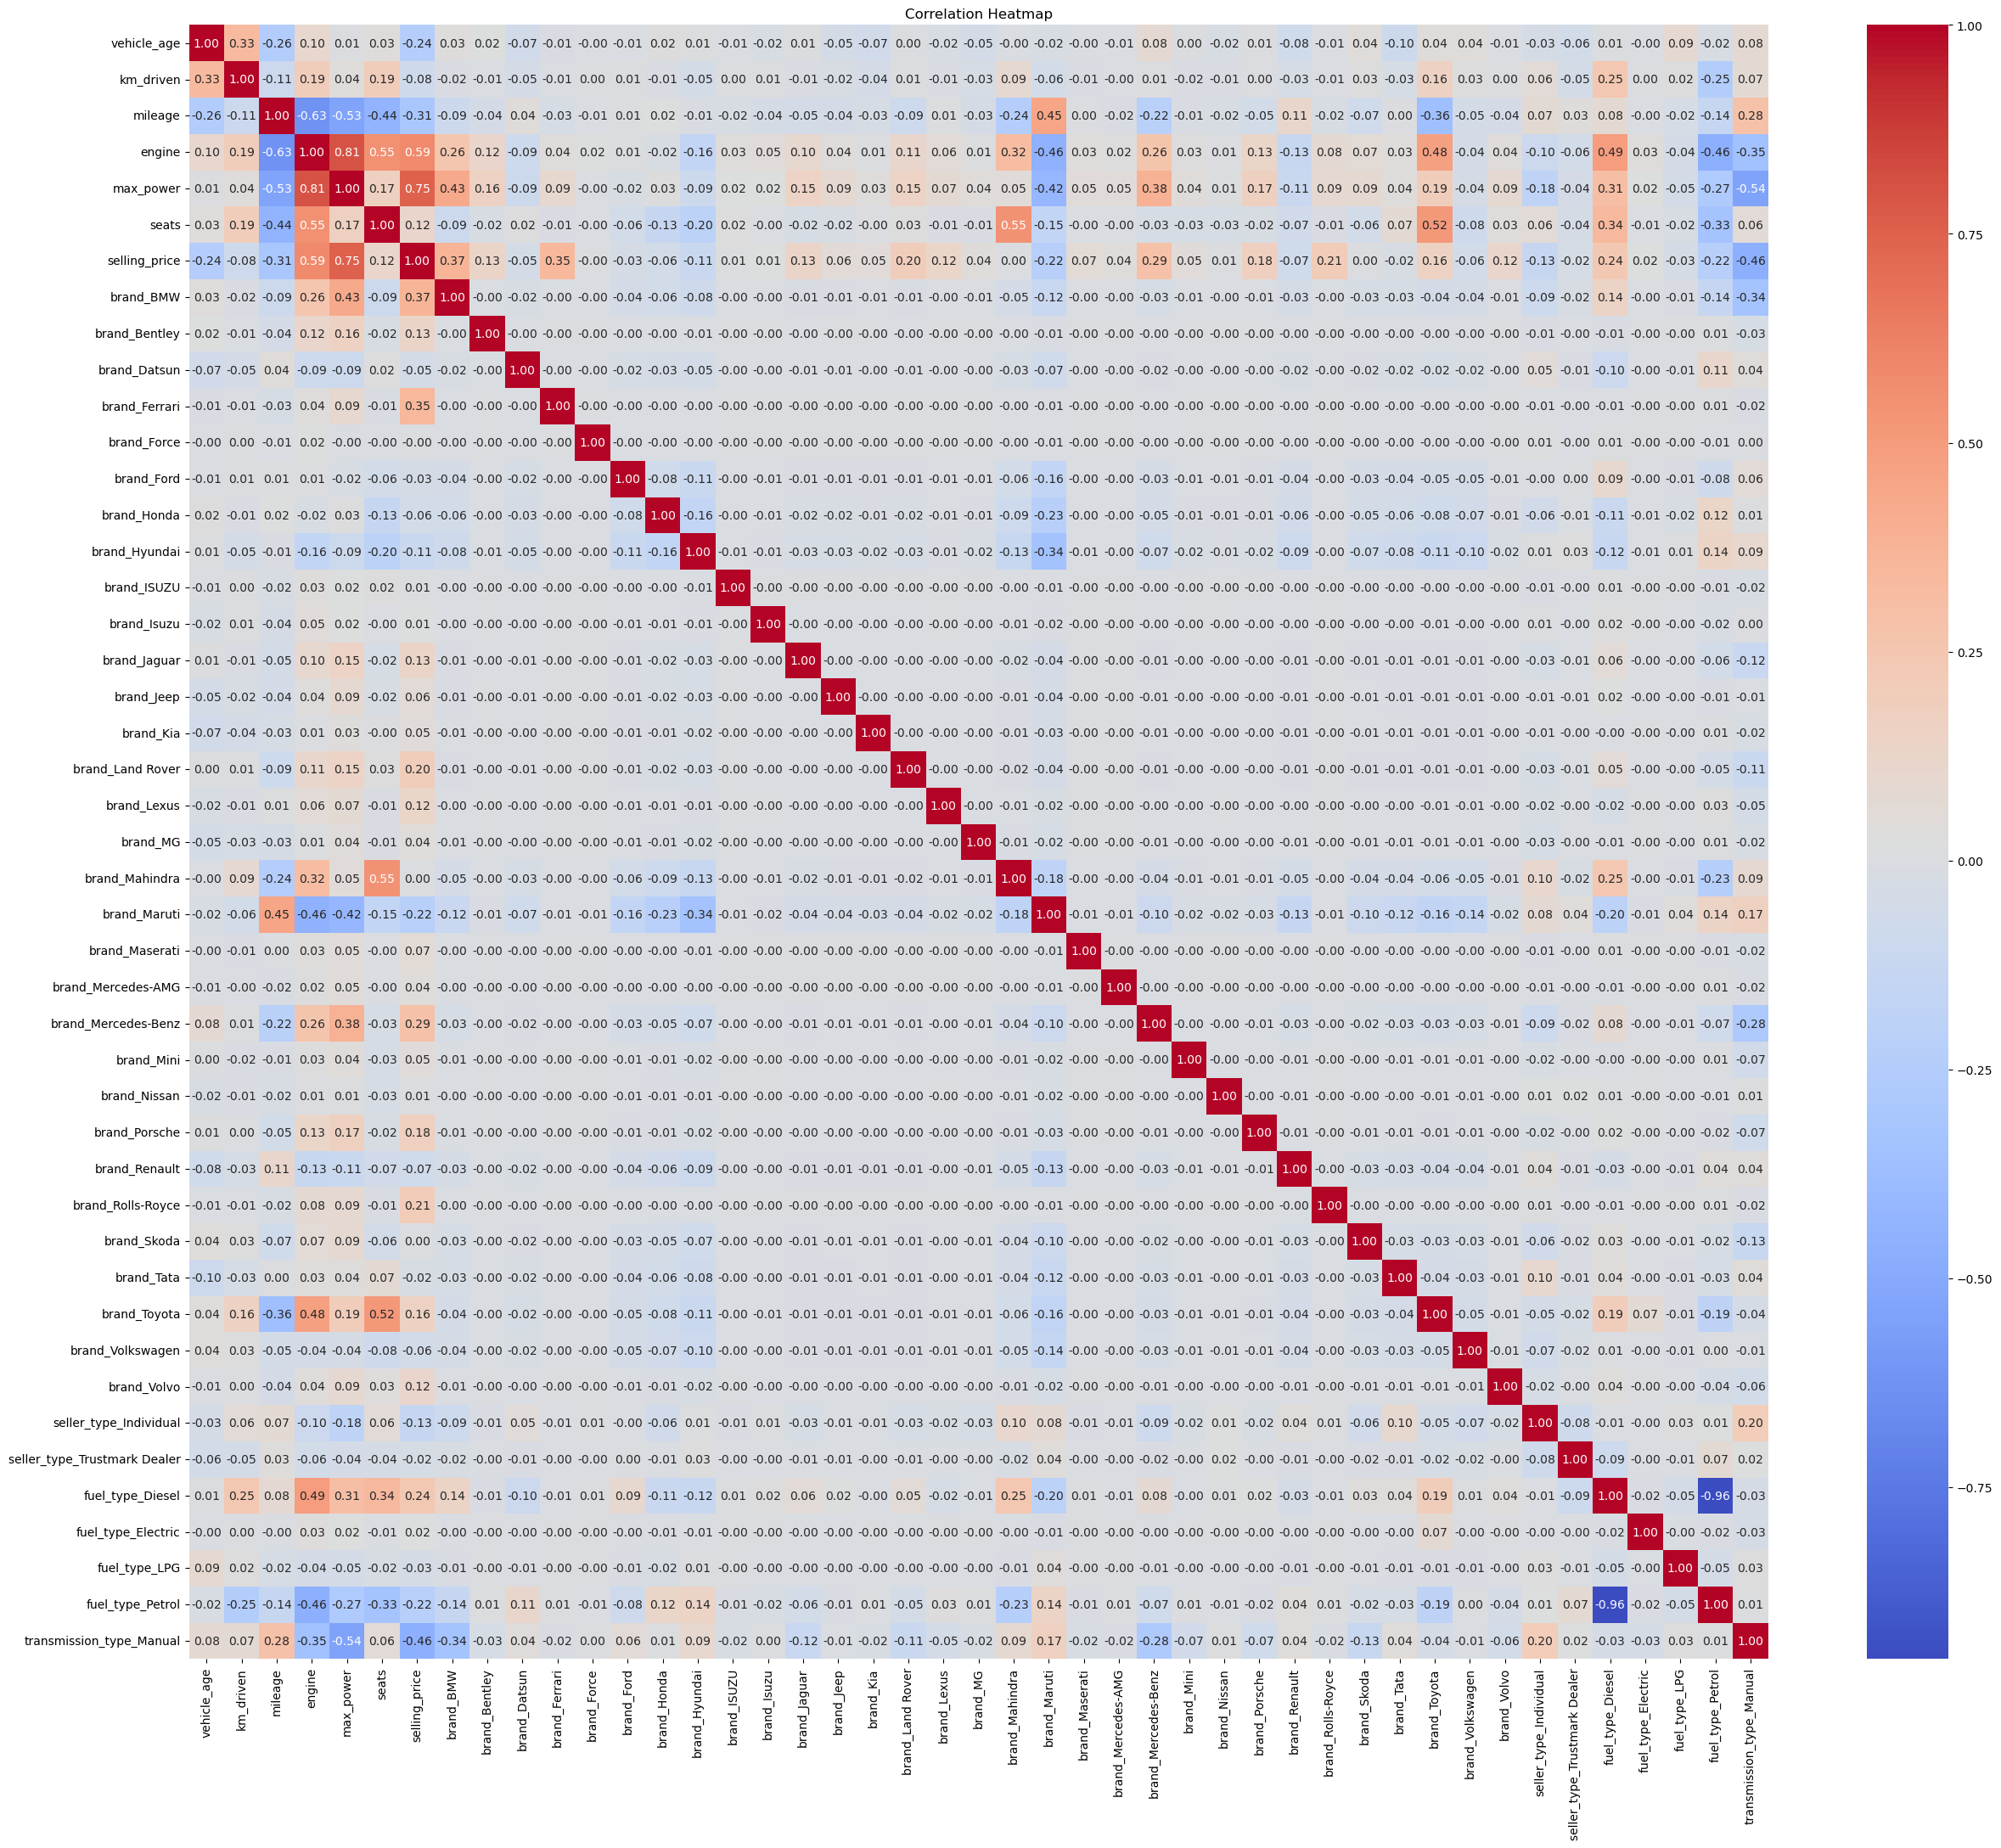

In [12]:
plt.figure(figsize=(30,25))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [14]:
#library import

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42 )

In [17]:
X_train,X_test

(       vehicle_age  km_driven  mileage  engine  max_power  seats  brand_BMW  \
 11210            7      70252    11.20    2400     215.00      5          0   
 1347             2      10000    23.84    1199      84.00      5          0   
 10363            2       6000    19.00    1950     241.30      5          0   
 316              7      63000    17.80    1497     117.30      5          0   
 10638           10      80292    20.36    1197      78.90      5          0   
 ...            ...        ...      ...     ...        ...    ...        ...   
 5191             7     127731    20.77    1248      88.80      7          0   
 13418           11      59000    16.09    1598     103.20      5          0   
 5390             7      20000    20.51     998      67.04      5          0   
 860              2      15000    18.60    1197      81.86      5          0   
 7270             2      30000    20.28    1462     103.25      5          0   
 
        brand_Bentley  brand_Datsun  b

In [18]:
X_train_columns = X_train.columns

In [19]:
scaler = StandardScaler()


In [20]:
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)

In [21]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = regression.predict(X_test)

In [23]:
y_pred_1 = regression.predict(X_train)

In [110]:
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.7359948378848246
RMSE: 445800.7162778808


In [24]:
print('R2 Score:', r2_score(y_train ,y_pred_1))
print('RMSE:', mean_squared_error(y_train, y_pred_1, squared=False))

R2 Score: 0.8015753782439603
RMSE: 401159.90657132206


C:\Users\Excel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


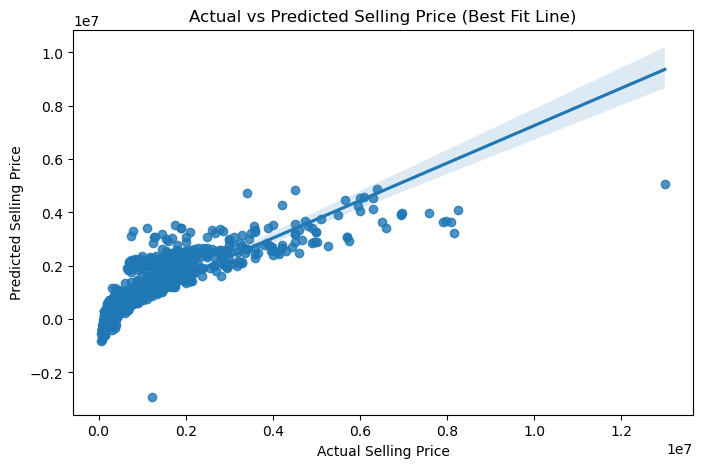

In [111]:
plt.figure(figsize=(8,5))
sns.regplot(y_test,y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Best Fit Line)')
plt.show()

In [119]:
def predict_new_car(input_data):
    new_df = pd.DataFrame(np.zeros((1, len(X_train_columns))), columns=X_train_columns)
    for key, value in input_data.items():
        if key in new_df.columns:
            new_df[key] = value

    new_scaled = scaler.transform(new_df)

    predicted_price = regression.predict(new_scaled)
    return predicted_price[0]

new_car_data = {
    'vehicle_age': 5,
    'km_driven': 30000,
    'mileage': 20.0,
    'engine': 1197,
    'max_power': 83.8,
    'seats': 5,
    'brand_Hyundai': 1, 
    'transmission_type_Manual': 1, 
}

predicted_price = predict_new_car(new_car_data)
print(f"Predicted Selling Price: {predicted_price}")

Predicted Selling Price: 600242.752594066


In [112]:
from sklearn.model_selection import GridSearchCV

In [126]:
# 1. Ridge Regression
ridge = Ridge()
ridge_reg = {'alpha': [0.01, 0.1, 1, 10, 100]} 
ridge_regression = GridSearchCV(ridge,ridge_reg, cv=5)
ridge_regression.fit(X_train, y_train)
print('Best alpha for Ridge:', ridge_regression.best_params_)
y_pred_ridge = ridge_regression.predict(X_test)
print('Ridge R2 Score:', r2_score(y_test, y_pred_ridge))
print('Ridge RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))

Best alpha for Ridge: {'alpha': 0.01}
Ridge R2 Score: 0.7359949660285853
Ridge RMSE: 445800.60808570235


In [127]:
# 2. Lasso Regression
lasso = Lasso()
lasso_reg = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_regression = GridSearchCV(lasso,lasso_reg, cv=5)
lasso_regression.fit(X_train, y_train)
print('Best alpha for Lasso:', lasso_regression.best_params_)
y_pred_lasso = lasso_regression.predict(X_test)
print('Lasso R2 Score:', r2_score(y_test, y_pred_lasso))
print('Lasso RMSE:', mean_squared_error(y_test, y_pred_lasso, squared=False))

Best alpha for Lasso: {'alpha': 100}
Lasso R2 Score: 0.7361586336804401
Lasso RMSE: 445662.401534586


In [128]:
# 3. ElasticNet Regression
elastic = ElasticNet()
elastic_reg = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9] 
}
elastic_regression = GridSearchCV(elastic,elastic_reg, cv=5)
elastic_regression.fit(X_train, y_train)
print('Best params for ElasticNet:', elastic_regression.best_params_)
y_pred_elastic = elastic_regression.predict(X_test)
print('ElasticNet R2 Score:', r2_score(y_test, y_pred_elastic))
print('ElasticNet RMSE:', mean_squared_error(y_test, y_pred_elastic, squared=False))

Best params for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}
ElasticNet R2 Score: 0.7361178445163448
ElasticNet RMSE: 445696.8493062908
